<a href="https://colab.research.google.com/github/chellick/Super_resolution/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(None, None, 3)),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(3, 3, padding='same'),
])

model.compile(optimizer='adam', loss='mean_squared_error')

x_train_lr = tf.image.resize(x_train, (x_train.shape[1] // 2, x_train.shape[2] // 2))
x_test_lr = tf.image.resize(x_test, (x_test.shape[1] // 2, x_test.shape[2] // 2))

y_train_hr = x_train
y_test_hr = x_test

model.summary()

model.fit(x_train_lr, y_train_hr, batch_size=32, epochs=5, validation_split=0.1)

loss = model.evaluate(x_test_lr, y_test_hr)
print("Test loss:", loss)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, None, None, 64)    1792      
                                                                 
 conv2d_51 (Conv2D)          (None, None, None, 64)    36928     
                                                                 
 conv2d_52 (Conv2D)          (None, None, None, 64)    36928     
                                                                 
 up_sampling2d_10 (UpSamplin  (None, None, None, 64)   0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, None, None, 64)    36928     
                                                                 
 conv2d_54 (Conv2D)          (None, None, None, 3)     1731      
                                                      

Show HR and LR

313/313 [==============================] - 1s 2ms/step


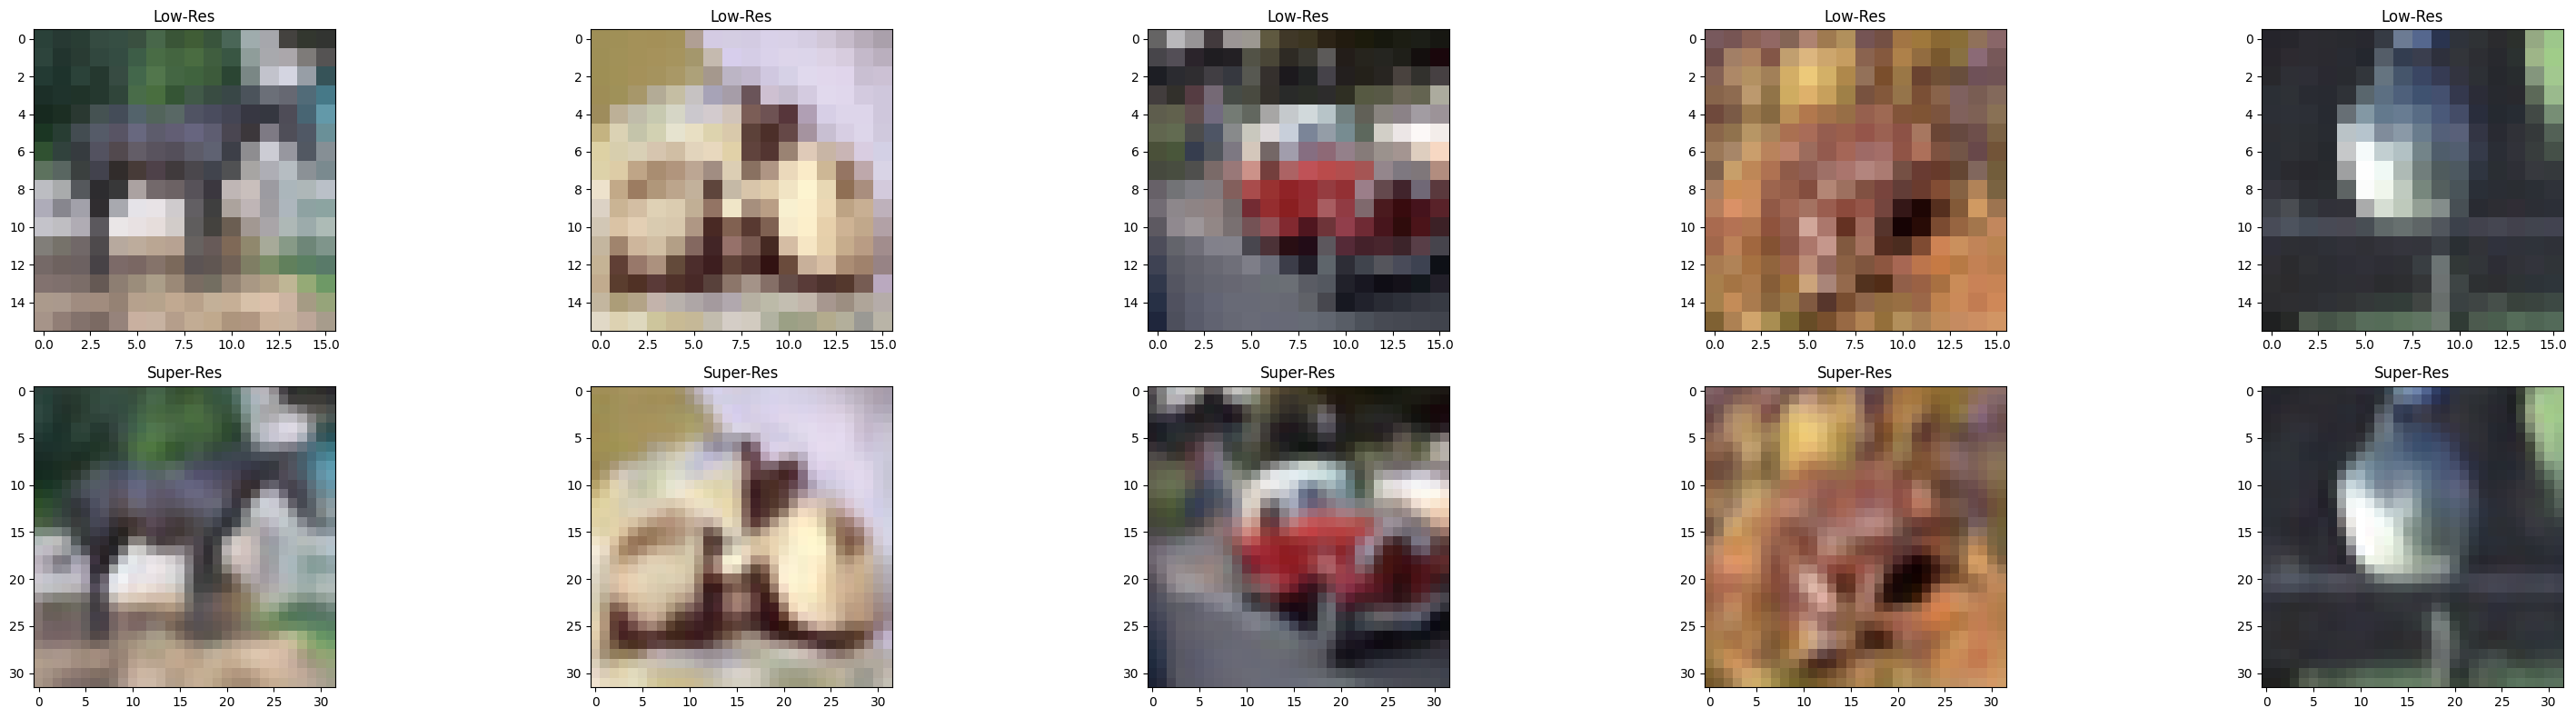

In [ ]:
predicted_hr = model.predict(x_test_lr)

indices = np.random.randint(0, len(x_test_lr), size=5)

plt.figure(figsize=(32, 8))

for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_lr[index])
    plt.title("Low-Res")

    plt.subplot(2, 5, i + 6)
    plt.imshow(predicted_hr[index])
    plt.title("Super-Res")

plt.tight_layout()
plt.show()


In [3]:
from tensorflow import keras
import numpy

def create_model():
    inputs = keras.Input((100, 100), name="img")
    x = keras.layers.Conv2D(64, 3, padding="same", activation='relu')(inputs)
    x = keras.layers.UpSampling2D((2, 2))(x)
    x = keras.layers.Conv2D(32, 3, padding="same", activation='relu')(x)
    x = keras.layers.UpSampling2D((2, 2))(x)
    x = keras.layers.Conv2D(32, 3, padding="same", activation='relu')(x)
    x = keras.layers.UpSampling2D((2, 2))(x)
    outputs = keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2))(x)
    return keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model = create_model()
model.summary()

In [5]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]